In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
eq20_years = pd.read_csv('1999-2019.csv')
eq1_year = pd.read_csv('earthquake.csv')
eq_sichuan = pd.read_csv('sichuan.csv')

In [3]:
eq20_years.sample(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
74054,2013-11-28T01:19:09.120Z,39.5265,73.6275,42.74,4.6,mb,NaN,59.0,1.870,0.85,...,2014-02-12T01:08:35.000Z,"39km SE of Sary-Tash, Kyrgyzstan",earthquake,NaN,6.9,0.081,NaN,reviewed,us,us
130308,2000-05-24T16:44:48.130Z,-36.3180,-100.3810,10.00,4.5,mb,NaN,NaN,NaN,1.25,...,2014-11-07T01:10:11.504Z,southeast of Easter Island,earthquake,NaN,NaN,NaN,2.0,reviewed,us,us
68053,2017-09-08T13:43:55.020Z,15.2494,-94.5913,35.03,4.5,mb,NaN,150.0,1.550,1.40,...,2017-12-07T20:00:22.040Z,"109km S of San Francisco del Mar, Mexico",earthquake,6.7,8.9,0.089,37.0,reviewed,us,us
68166,2017-09-03T03:21:42.570Z,11.9775,-87.9271,8.23,5.0,mww,NaN,145.0,1.115,1.05,...,2017-12-07T20:00:05.040Z,"99km SW of Corinto, Nicaragua",earthquake,6.4,4.3,0.066,22.0,reviewed,us,us
97082,2012-09-03T16:36:43.250Z,2.4360,-95.4050,10.00,4.7,mb,163.0,79.9,NaN,0.76,...,2014-11-07T01:48:46.493Z,"Galapagos Islands, Ecuador region",earthquake,NaN,NaN,NaN,127.0,reviewed,us,us


In [4]:
eq20_years.iloc[6666]

time                  2010-05-10T00:25:29.740Z
latitude                                -2.881
longitude                              101.101
depth                                     56.7
mag                                        4.6
magType                                     mb
nst                                         25
gap                                      180.7
dmin                                       NaN
rms                                       0.85
net                                         us
id                                  usp000hcjh
updated               2014-11-07T01:41:28.481Z
place              southern Sumatra, Indonesia
type                                earthquake
horizontalError                            NaN
depthError                                   8
magError                                   NaN
magNst                                       3
status                                reviewed
locationSource                              us
magSource    

### 1. 数据清洗
- 选取出需要的字段
- 数据类型转换

In [5]:
eq20_years.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [6]:
cols = ['time', 'latitude', 'longitude', 'depth', 'mag', 
        'magType', 'id', 'place', 'type', 'status']
eq20_years = eq20_years[cols]
eq1_year = eq1_year[cols]
eq_sichuan = eq_sichuan[cols]

In [7]:
eq20_years['time'] = pd.to_datetime(eq20_years['time'])
eq1_year['time'] = pd.to_datetime(eq1_year['time'])
eq_sichuan['time'] = pd.to_datetime(eq_sichuan['time'])

### 2. 问题
- 最近地震越来越频繁了吗？还是报道的比较多而已？
- 引发地震的因素有哪些？
- 全世界地震频发的地区有哪些？
- 有哪些引发全世界舆情关注的大地震？
- 为什么四川省及其周围好像从2008年开始就地震频发？

#### 2.1 最近地震越来越频繁了吗？还是报道的比较多而已？

In [8]:
eq20_years.sample(5)

,time,latitude,longitude,depth,mag,magType,id,place,type,status
63743,2018-04-23 15:48:52.860000+00:00,36.0172,0.0472,8.04,4.7,mb,us1000dqq7,"10km NNW of Mostaganem, Algeria",earthquake,reviewed
49562,2016-10-15 02:44:48.820000+00:00,-24.1129,-66.8771,193.41,4.5,mb,us20007eaa,"57km WNW of San Antonio de los Cobres, Argentina",earthquake,reviewed
120256,2011-11-09 05:24:38.080000+00:00,36.2810,140.8810,37.10,4.8,mb,usp000jam3,"near the east coast of Honshu, Japan",earthquake,reviewed
106011,2004-07-10 04:14:19.530000+00:00,-36.8450,78.3570,10.00,4.8,mb,usp000czw2,Mid-Indian Ridge,earthquake,reviewed
98247,2012-06-30 00:46:49.010000+00:00,43.4420,84.8960,10.00,4.5,mb,usp000jnda,"northern Xinjiang, China",earthquake,reviewed


In [9]:
eq20_years.index = eq20_years['time']
eq20_years['year'] = eq20_years['time'].dt.year

In [10]:
eq20_years['time'].describe()

<ipython-input-10-111cfbeddf4e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  eq20_years['time'].describe()


count                               134063
unique                              134062
top       2001-12-28 21:14:01.950000+00:00
freq                                     2
first     1999-06-25 00:13:36.590000+00:00
last      2019-06-24 13:55:59.891000+00:00
Name: time, dtype: object

In [11]:
# 选取2000年1月1日到2019年6月24日的数据
eq20_years = eq20_years[eq20_years['time'] > pd.to_datetime('2000-01-01 00:00:00', utc=True)]

<AxesSubplot:xlabel='time'>

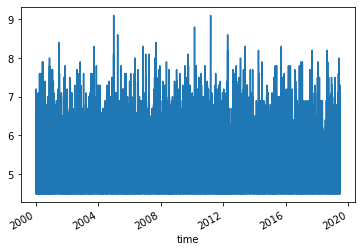

In [12]:
eq20_years['mag'].plot()

In [13]:
eq_by_years = eq20_years['id'].groupby(eq20_years['year']).count()

In [14]:
eq_by_years[:-1].mean()

6764.105263157895

In [15]:
from pyecharts import Bar


bar = Bar("近20年全球4.5级以上地震发生次数", "时间: 2000年1月1日-2019年6月24日", width=700)
bar.add("", list(eq_by_years.index), list(eq_by_years.values),
        is_stack=True,  bar_category_gap='40%', label_text_size=18,
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18,
       mark_line_raw = [{'yAxis':6764}])

bar

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [16]:
6764-6309

455

In [17]:
eq_by_years_7 = eq20_years[eq20_years['mag']>7].groupby('year')['id'].count()

In [18]:
eq_by_years_7[:-1].mean()

12.789473684210526

In [19]:
from pyecharts import Bar


bar = Bar("近20年全球7级以上地震发生次数", "时间: 2000年1月1日-2019年6月24日", width=700)
bar.add("", list(eq_by_years_7.index), list(eq_by_years_7.values),
        is_stack=True,  bar_category_gap='40%', label_text_size=18,
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18,
       mark_line_raw = [{'yAxis':12.8}])

bar

In [20]:
eq_by_month = eq20_years['id'].resample('M').count().reset_index()

In [21]:
eq_by_month['year'] = eq_by_month['time'].dt.year

In [22]:
eq_by_month.tail(6)

,time,id,year
228,2019-01-31 00:00:00+00:00,654,2019
229,2019-02-28 00:00:00+00:00,560,2019
230,2019-03-31 00:00:00+00:00,617,2019
231,2019-04-30 00:00:00+00:00,636,2019
232,2019-05-31 00:00:00+00:00,521,2019
233,2019-06-30 00:00:00+00:00,359,2019


In [23]:
from pyecharts import Line


month_name = ['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月']
line = Line("近5年全球每月4.5级以上地震次数", width=800, height=400)
for y in range(2015, 2019):
    sub_data = eq_by_month[eq_by_month['year'] == y]
    line.add(str(y), month_name, list(sub_data['id']), is_smooth=True,
             legend_text_size=15,xaxis_label_textsize=16, yaxis_label_textsize=18,legend_top=30)

line.add('2019', month_name, [654, 560, 617, 636, 521, 359, None, None, None, None, None, None], is_smooth=True,
             legend_text_size=15,xaxis_label_textsize=16,
             yaxis_label_textsize=18,legend_top=30)
line

#### 2.2 引发地震的因素有哪些？

In [24]:
eq1_year.sample(5)

,time,latitude,longitude,depth,mag,magType,id,place,type,status
45240,2018-07-18 00:35:24.250000+00:00,38.836667,-122.823500,1.32,1.81,md,nc73048531,"9km NW of The Geysers, CA",earthquake,reviewed
9818,2018-10-31 06:48:21.420000+00:00,33.676833,-117.360167,9.01,0.78,ml,ci37409274,"3km WNW of Lake Elsinore, CA",earthquake,reviewed
95255,2019-04-22 14:59:08.960000+00:00,33.315833,-116.287833,9.92,1.26,ml,ci38556024,"10km NE of Borrego Springs, CA",earthquake,reviewed
108699,2018-12-27 21:08:37.176000+00:00,61.447200,-149.950700,31.00,2.10,ml,ak20560208,"8km S of Big Lake, Alaska",earthquake,automatic
18805,2018-12-06 08:05:23.963000+00:00,64.878600,-149.020300,14.10,0.40,ml,ak20449351,"33km N of North Nenana, Alaska",earthquake,reviewed


In [25]:
eq_type = eq1_year['type'].value_counts()
eq_type

earthquake            158194
quarry blast            1173
explosion               1023
ice quake                776
mining explosion         214
other event              136
volcanic eruption         28
chemical explosion        15
mine collapse              2
sonic boom                 2
rock burst                 2
Name: type, dtype: int64

In [26]:
np.round(eq_type/eq_type.sum()*100, 2)

earthquake            97.91
quarry blast           0.73
explosion              0.63
ice quake              0.48
mining explosion       0.13
other event            0.08
volcanic eruption      0.02
chemical explosion     0.01
mine collapse          0.00
sonic boom             0.00
rock burst             0.00
Name: type, dtype: float64

In [27]:
eq1_year['time'].describe()

<ipython-input-27-32d015f2f9bb>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  eq1_year['time'].describe()


count                               161565
unique                              161552
top       2018-08-03 21:16:00.990000+00:00
freq                                     2
first     2018-06-25 00:01:27.580000+00:00
last      2019-06-24 06:52:27.530000+00:00
Name: time, dtype: object

In [28]:
eq_type

earthquake            158194
quarry blast            1173
explosion               1023
ice quake                776
mining explosion         214
other event              136
volcanic eruption         28
chemical explosion        15
mine collapse              2
sonic boom                 2
rock burst                 2
Name: type, dtype: int64

In [29]:
from pyecharts import Sankey

nodes = [
    {'name': '构造地震'}, {'name': '天然地震'}, {'name': '火山喷发'},
    {'name': '火山地震'}, {'name': '冰震'}, {'name': '塌陷地震'},
    {'name': '矿井塌陷'}, {'name': '岩爆'}, {'name': '采石场爆破'},
    {'name': '爆炸'}, {'name': '煤矿爆炸'}, {'name': '化学爆炸'},
    {'name': '人工地震'}, {'name': '水库地震'}, {'name': '油田注水'},
    {'name': '诱发地震'}
]

links = [
    {'source': '构造地震', 'target': '天然地震', 'value': 5000},  #为了图形显示，这里重置了构造地震真实值
    {'source': '火山喷发', 'target': '火山地震', 'value': 28},
    {'source': '火山地震', 'target': '天然地震', 'value': 28},
    {'source': '冰震', 'target': '塌陷地震', 'value': 776},
    {'source': '矿井塌陷', 'target': '塌陷地震', 'value': 2},
    {'source': '岩爆', 'target': '塌陷地震', 'value': 2},
    {'source': '塌陷地震', 'target': '天然地震', 'value': 780},
    {'source': '采石场爆破', 'target': '人工地震', 'value': 1173},
    {'source': '爆炸', 'target': '人工地震', 'value': 1023},
    {'source': '煤矿爆炸', 'target': '人工地震', 'value': 214},
    {'source': '化学爆炸', 'target': '人工地震', 'value': 15},
    {'source': '水库地震', 'target': '诱发地震', 'value': 50},
    {'source': '油田注水', 'target': '诱发地震', 'value': 50},
]
sankey = Sankey("近一年全球所有地震的地震类型", "时间: 2018年6月25日至2019年6月24日", width=800, height=900)
sankey.add(
    "",
    nodes,
    links,
    line_opacity=0.2,
    line_curve=0.5,
    line_color="source",
    is_label_show=True,
    label_pos="right",
)
sankey

In [30]:
eq1_year.shape

(161565, 10)

#### 2.3 全世界地震频发的地区有哪些？

In [31]:
eq20_years.shape

(131865, 11)

In [32]:
eq20_years.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'id',
       'place', 'type', 'status', 'year'],
      dtype='object')

In [33]:
eq_place = eq20_years.sample(30000)[['latitude', 'longitude', 'mag']]
eq_place['latitude'] = eq_place['latitude'].astype(str)
eq_place['longitude'] = eq_place['longitude'].astype(str)
eq_place['latlon'] = eq_place['longitude'].str.cat(eq_place['latitude'], sep=',')

In [34]:
eq_place.to_csv('eq_place.csv', index=False)

In [35]:
eq20_years[eq20_years['mag'] > 6].shape

(2343, 11)

In [36]:
eq_place_6 = eq20_years[eq20_years['mag'] > 6]
eq_place_6['latitude'] = eq_place_6['latitude'].astype(str)
eq_place_6['longitude'] = eq_place_6['longitude'].astype(str)
eq_place_6['latlon'] = eq_place_6['longitude'].str.cat(eq_place_6['latitude'], sep=',')

eq_place_6.to_csv('eq_place_6.csv', index=False)

<ipython-input-36-da624fa49e4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq_place_6['latitude'] = eq_place_6['latitude'].astype(str)
<ipython-input-36-da624fa49e4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq_place_6['longitude'] = eq_place_6['longitude'].astype(str)
<ipython-input-36-da624fa49e4f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [37]:
region = []
for l in eq20_years['place'].str.split(',').tolist():
    try:
        region.append(l[-1].strip())
    except TypeError:
        region.append(np.nan)

In [38]:
eq20_years['region'] = region

In [39]:
region_top10 = eq20_years['region'].value_counts().nlargest(11)
region_top10

Indonesia           15661
Japan                9646
Papua New Guinea     7827
Chile                5249
Philippines          4379
Tonga                4167
Vanuatu              3489
New Zealand          2982
Solomon Islands      2958
Alaska               2700
Japan region         2522
Name: region, dtype: int64

In [40]:
from pyecharts import Bar


r = ['印尼', '日本', '新几内亚', '智利', '菲律宾', '汤加', '瓦努阿图', '新西兰', '所罗门群岛', '阿拉斯加州']
num = [15661, 9646+2522, 7827, 5249, 4379, 4167, 3489, 2982, 2958, 2700]
bar = Bar("近20年全球4.5级以上地震次数最多的国家/地区", "时间: 2000年1月1日-2019年6月24日, 单位:次", width=900)
bar.add("", r, num, 
        is_stack=True,  bar_category_gap='40%', label_text_size=18, 
        xaxis_label_textsize=11,yaxis_label_textsize=20, xaxis_rotate=0)

bar

#### 2.4 近20年有哪些引发全世界舆情关注的大地震？

In [41]:
eq_gt_6 = eq20_years[eq20_years['mag'] > 6]

In [42]:
eq_gt_6[eq_gt_6['mag']<7].shape[0]

2041

In [43]:
eq_gt_6[(eq_gt_6['mag']>=7)&(eq_gt_6['mag']<8)].shape[0]

278

In [44]:
eq_gt_6[(eq_gt_6['mag']>=8)&(eq_gt_6['mag']<9)].shape[0]

22

In [45]:
eq_gt_6[eq_gt_6['mag']>=9].shape[0]

2

In [46]:
eq_gt_7 = eq20_years[eq20_years['mag'] > 7]

In [47]:
eq_gt_7['influence'] = eq_gt_7['mag'] + np.round(10/(eq_gt_7['depth']+5))

<ipython-input-47-b6237f41f3df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq_gt_7['influence'] = eq_gt_7['mag'] + np.round(10/(eq_gt_7['depth']+5))


In [48]:
eq_gt_7.loc[eq_gt_7.sort_values(by=['mag', 'depth'], ascending=[False, True]).index].head(30)

,time,latitude,longitude,depth,mag,magType,id,place,type,status,year,region,influence
time,,,,,,,,,,,,,
2011-03-11 05:46:24.120000+00:00,2011-03-11 05:46:24.120000+00:00,38.2970,142.3730,29.00,9.1,mww,official20110311054624120_30,"2011 Great Tohoku Earthquake, Japan",earthquake,reviewed,2011,Japan,9.1
2004-12-26 00:58:53.450000+00:00,2004-12-26 00:58:53.450000+00:00,3.2950,95.9820,30.00,9.1,mw,official20041226005853450_30,2004 Sumatra - Andaman Islands Earthquake,earthquake,reviewed,2004,2004 Sumatra - Andaman Islands Earthquake,9.1
2010-02-27 06:34:11.530000+00:00,2010-02-27 06:34:11.530000+00:00,-36.1220,-72.8980,22.90,8.8,mww,official20100227063411530_30,"offshore Bio-Bio, Chile",earthquake,reviewed,2010,Chile,8.8
2012-04-11 08:38:36.720000+00:00,2012-04-11 08:38:36.720000+00:00,2.3270,93.0630,20.00,8.6,mw,official20120411083836720_20,off the west coast of northern Sumatra,earthquake,reviewed,2012,off the west coast of northern Sumatra,8.6
2005-03-28 16:09:36.530000+00:00,2005-03-28 16:09:36.530000+00:00,2.0850,97.1080,30.00,8.6,mww,official20050328160936530_30,"northern Sumatra, Indonesia",earthquake,reviewed,2005,Indonesia,8.6
2001-06-23 20:33:14.130000+00:00,2001-06-23 20:33:14.130000+00:00,-16.2650,-73.6410,33.00,8.4,mww,official20010623203314130_33,near the coast of southern Peru,earthquake,reviewed,2001,near the coast of southern Peru,8.4
2007-09-12 11:10:26.830000+00:00,2007-09-12 11:10:26.830000+00:00,-4.4380,101.3670,34.00,8.4,mww,official20070912111026830_34,"southern Sumatra, Indonesia",earthquake,reviewed,2007,Indonesia,8.4
2006-11-15 11:14:13.570000+00:00,2006-11-15 11:14:13.570000+00:00,46.5920,153.2660,10.00,8.3,mwc,usp000exfn,Kuril Islands,earthquake,reviewed,2006,Kuril Islands,9.3
2015-09-16 22:54:32.860000+00:00,2015-09-16 22:54:32.860000+00:00,-31.5729,-71.6744,22.44,8.3,mww,us20003k7a,"48km W of Illapel, Chile",earthquake,reviewed,2015,Chile,8.3


In [49]:
eq_gt_7.to_csv('eq_gt_7.csv', index=False)

#### 2.5 为什么四川省及其周围好像从2008年开始就地震频发？

In [50]:
eq_sichuan.sample(5)

,time,latitude,longitude,depth,mag,magType,id,place,type,status
733,2002-12-24 10:23:37.440000+00:00,30.4450,96.6340,33.0,4.6,mb,usp000bmap,eastern Xizang,earthquake,reviewed
256,2011-11-01 17:18:06.990000+00:00,34.5380,104.1720,31.9,5.0,mb,usp000ja74,"Gansu, China",earthquake,reviewed
1012,1986-02-05 21:59:36.580000+00:00,29.7920,98.3280,33.0,5.1,mb,usp0002qrg,eastern Xizang,earthquake,reviewed
1034,1983-10-18 09:53:03.500000+00:00,30.4640,102.6960,33.0,4.7,mb,usp0001z2s,"western Sichuan, China",earthquake,reviewed
19,2019-01-07 17:15:44.420000+00:00,26.7955,99.4683,10.0,4.5,mb,us2000j159,"39km N of Jinding, China",earthquake,reviewed


In [51]:
eq_sichuan[['latitude', 'longitude', 'mag']].describe()

,latitude,longitude,mag
count,1073.000000,1073.000000,1073.000000
mean,30.260878,102.387508,4.803914
std,2.324542,2.668046,0.352342
min,25.820000,96.504000,4.500000
25%,28.264900,100.099000,4.600000
50%,30.883000,103.473700,4.700000
75%,31.829000,104.315000,4.900000
max,35.624000,108.807600,7.900000


In [52]:
eq_sichuan['time'].describe()

<ipython-input-52-0da9da4915f0>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  eq_sichuan['time'].describe()


count                                 1073
unique                                1073
top       2019-02-23 21:38:10.120000+00:00
freq                                     1
first     1979-08-05 05:18:22.500000+00:00
last      2019-06-24 01:23:16.859000+00:00
Name: time, dtype: object

In [53]:
eq_sichuan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   time       1073 non-null   datetime64[ns, UTC]
 1   latitude   1073 non-null   float64            
 2   longitude  1073 non-null   float64            
 3   depth      1073 non-null   float64            
 4   mag        1073 non-null   float64            
 5   magType    1073 non-null   object             
 6   id         1073 non-null   object             
 7   place      1073 non-null   object             
 8   type       1073 non-null   object             
 9   status     1073 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(4), object(5)
memory usage: 84.0+ KB


In [54]:
eq_sichuan['year'] = eq_sichuan['time'].dt.year

In [55]:
eq_sichuan_years = eq_sichuan.groupby('year')['id'].count()

In [56]:
from pyecharts import Line


line = Line("近40年四川省及其周围4.5级以上地震次数", width=800, height=400)

line.add('', eq_sichuan_years.index, eq_sichuan_years.values, is_smooth=True,
             legend_text_size=15,xaxis_label_textsize=16,
             yaxis_label_textsize=18)
line

In [57]:
eq_sichuan_years.loc[2009:2018].mean()

30.9

In [58]:
eq_sichuan_years.loc[1979:2007].mean()

13.89655172413793

In [59]:
eq_sichuan_years.values

array([  3,   7,  11,   9,  10,   8,  10,  16,   8,  17,  54,  15,  12,
        11,  15,   7,  18,  26,  19,  10,   9,  18,  16,  11,  18,  16,
        10,  13,   6, 340,  31,  27,  21,  17,  71,  43,  20,  24,  31,
        24,  21], dtype=int64)

In [60]:
eq_sichuan[eq_sichuan['mag']>6]

,time,latitude,longitude,depth,mag,magType,id,place,type,status,year
58,2017-08-08 13:19:49.540000+00:00,33.1926,103.8552,9.0,6.5,mww,us2000a5x1,"36km WSW of Yongle, China",earthquake,reviewed,2017
146,2014-08-03 08:30:13.570000+00:00,27.1891,103.4086,12.0,6.2,mww,usb000rzmg,"11km W of Wenping, China",earthquake,reviewed,2014
223,2013-04-20 00:02:47.540000+00:00,30.3080,102.8880,14.0,6.6,mww,usb000gcdd,"56km WSW of Linqiong, China",earthquake,reviewed,2013
291,2010-04-13 23:49:38.330000+00:00,33.1650,96.5480,17.0,6.9,mwc,usp000hbbt,"southern Qinghai, China",earthquake,reviewed,2010
445,2008-05-25 08:21:49.990000+00:00,32.5600,105.4230,18.0,6.1,mwc,usp000g7r4,"Sichuan-Gansu border region, China",earthquake,reviewed,2008
592,2008-05-12 11:11:02.480000+00:00,31.2140,103.6180,10.0,6.1,mwc,usp000g68b,"eastern Sichuan, China",earthquake,reviewed,2008
663,2008-05-12 06:28:01.570000+00:00,31.0020,103.3220,19.0,7.9,mwc,usp000g650,"eastern Sichuan, China",earthquake,reviewed,2008
771,2000-09-12 00:27:58.620000+00:00,35.3890,99.3430,10.0,6.1,mwc,usp000a03h,"southern Qinghai, China",earthquake,reviewed,2000
774,2000-06-07 21:46:55.900000+00:00,26.8560,97.2380,33.0,6.3,mwc,usp0009u6j,Myanmar,earthquake,reviewed,2000
841,1996-02-03 11:14:20.120000+00:00,27.2910,100.2760,11.1,6.6,mw,usp0007c7g,"Sichuan-Yunnan border region, China",earthquake,reviewed,1996


In [61]:
eq_sichuan['latitude'] = eq_sichuan['latitude'].astype(str)
eq_sichuan['longitude'] = eq_sichuan['longitude'].astype(str)
eq_sichuan['latlon'] = eq_sichuan['longitude'].str.cat(eq_sichuan['latitude'], sep=',')
eq_sichuan[['latitude', 'longitude', 'mag', 'latlon']].to_csv('sichuan_graph.csv', index=False)

#### 2.6 我国哪些地方比较经常发生地震？

In [62]:
eq_china = eq20_years[(eq20_years['latitude'] < 51.9824)
                      & (eq20_years['longitude'] < 136.1715) 
                      & (eq20_years['latitude'] > 0) 
                      & (eq20_years['longitude'] > 73.2418)]


In [63]:
eq_china = eq_china[['latitude', 'longitude', 'mag']]
eq_china['latitude'] = eq_china['latitude'].astype(str)
eq_china['longitude'] = eq_china['longitude'].astype(str)
eq_china['latlon'] = eq_china['longitude'].str.cat(eq_china['latitude'], sep=',')

eq_china.to_csv('eq_china.csv', index=False)